In [1]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# Define the SMILES string
smiles = "CCN(CC)c1ccc2oc(=O)c(C)nc2c1"

# Convert the SMILES string to a molecule
molecule = Chem.MolFromSmiles(smiles)

# Get the Murcko scaffold
scaffold = MurckoScaffold.GetScaffoldForMol(molecule)

# Convert the scaffold to a SMILES string
scaffold_smiles = Chem.MolToSmiles(scaffold)

print("Scaffold SMILES:", scaffold_smiles)

Scaffold SMILES: O=c1cnc2ccccc2o1


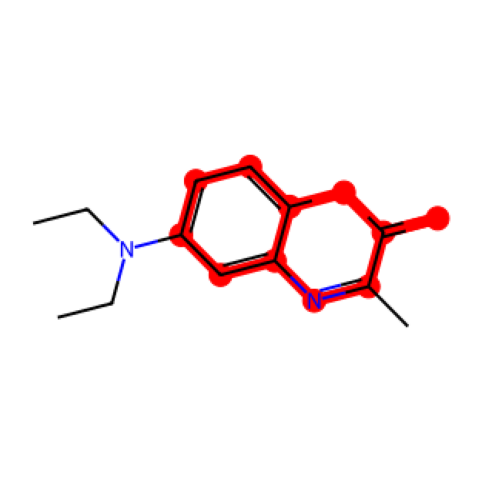

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt

def plot_molecule_with_scaffold(smiles):
    """
    Plots the molecule represented by a SMILES string, highlighting the scaffold in the figure.
    :param smiles: SMILES string of the molecule.
    """
    # Generate molecule and scaffold
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Invalid SMILES string: {smiles}")
    
    # Generate the scaffold
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    if scaffold is None:
        raise ValueError(f"No scaffold found for SMILES: {smiles}")
    
    # Get atom and bond indices for the scaffold
    scaffold_indices = mol.GetSubstructMatch(scaffold)
    if not scaffold_indices:
        raise ValueError(f"Cannot match scaffold substructure in SMILES: {smiles}")
    
    # Highlight scaffold atoms and bonds
    atom_highlights = list(scaffold_indices)
    bond_highlights = []
    for bond in scaffold.GetBonds():
        start = scaffold_indices[bond.GetBeginAtomIdx()]
        end = scaffold_indices[bond.GetEndAtomIdx()]
        bond_idx = mol.GetBondBetweenAtoms(start, end).GetIdx()
        bond_highlights.append(bond_idx)
    
    # Draw the molecule with highlighted scaffold
    img = Draw.MolToImage(mol, highlightAtoms=atom_highlights, highlightBonds=bond_highlights, highlightColor=(1, 0, 0))
    
    # Create a figure and add the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example usage
smiles = "CCN(CC)c1ccc2oc(=O)c(C)nc2c1"
plot_molecule_with_scaffold(smiles)